In [78]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True, font_scale=1.5)

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler #used incase of outliers
from sklearn.preprocessing import scale

# Rescale Data 

In [79]:
# When your data is comprised of attributes with varying scales, 
# many machine learning algorithms can benefit from rescaling the 
# attributes to all have the same scale.
# Often this is referred to as normalization and attributes are often 
# rescaled into the range between 0 and 1. This is useful for optimization 
# algorithms in used in the core of machine learning algorithms like 
# gradient descent. It is also useful for algorithms that weight inputs 
# like regression and neural networks and algorithms that use distance 
# measures like K-Nearest Neighbors.

# The MinMaxScaler is the probably the most famous scaling algorithm

In [80]:
# If the distribution is not Gaussian or the standard deviation is very 
# small, the min-max scaler works better.

# However, it is sensitive to outliers, so if there are outliers in the 
# data, you might want to consider the Robust Scaler.

In [81]:
data = [[-1, 2], [-0.5, 6], [3, 10], [1, 18]]


### Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

$ \frac{x_i – min(x)} {max(x) – min(x)} $

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

> If the distribution is __not Gaussian__ or the standard deviation is very small, the min-max scaler works __better__.

> However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

In [82]:
# instantiate the scaler
# copy : boolean, optional, default True
# Set to False to perform inplace row normalization

scaler = MinMaxScaler()

scaler.fit(data)

# data = [[-1, 2], [-0.5, 6], [3, 10], [1, 18]]

MinMaxScaler(copy=True, feature_range=(0, 1))

In [83]:
# Per feature maximum seen in the data
print('MAX           : ', scaler.data_max_)

# Per feature minimum seen in the data
print('MIN           : ', scaler.data_min_)

# Per feature range (data_max_ - data_min_) seen in the data
print('Range         : ', scaler.data_range_)

# Desired range of transformed data.
print('Feature Range : ', scaler.feature_range)

# Per feature relative scaling of the data.
print('Scale         : ', scaler.scale_)

MAX           :  [ 3. 18.]
MIN           :  [-1.  2.]
Range         :  [ 4. 16.]
Feature Range :  (0, 1)
Scale         :  [0.25  0.062]


In [84]:
data = [[-1, 2], [-0.5, 6], [3, 10], [1, 18]]

In [85]:
# Scaling features of X according to feature_range.
scaler.transform(data)

array([[0.   , 0.   ],
       [0.125, 0.25 ],
       [1.   , 0.5  ],
       [0.5  , 1.   ]])

In [86]:
# original data is not changed
data

[[-1, 2], [-0.5, 6], [3, 10], [1, 18]]

In [87]:
pwd()

'F:\\anaconda\\ML SL\\DataPreprocessing_Class4'

In [88]:
location = r"F:\anaconda\data sets\pima.csv"

In [89]:
# load the training data from pima data set
import pandas as pd
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
df_pima.shape

(768, 9)

In [91]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)

dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:, 0:8]
y = array[:, 8]

In [92]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [94]:
rescaledX = scaler.fit_transform(X)

In [95]:
# summarize transformed data
import numpy as np
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [96]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_scaled = pd.DataFrame(rescaledX, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


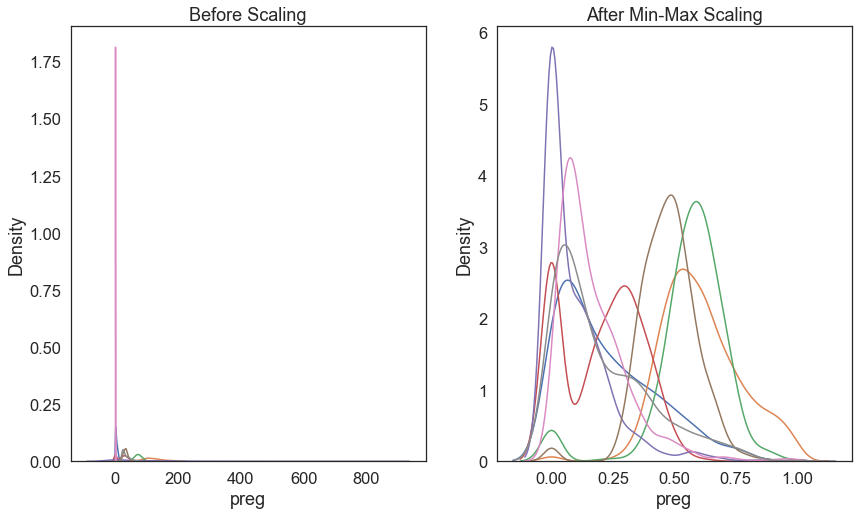

In [97]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)


ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

> Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

In [98]:
np.std(df_before_scale,axis = 0)/np.sum(np.std(df_before_scale,axis = 0))

preg    0.016368
plas    0.155305
pres    0.094020
skin    0.077487
test    0.559790
mass    0.038297
pedi    0.001609
age     0.057125
dtype: float64

---

### Standard Scaler

The __StandardScaler__ assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$ \frac {x_i – mean(x)} {stdev(x)}$

If data is __not normally distributed, this is not the best scaler to use.__



In [99]:
# Standardize Data *********************************************

# The mean and standard deviation are calculated for the feature and 
# then the feature is scaled based on:

# [xi–mean(x)]/stdev(x)

# If data is not normally distributed, this is not the best scaler to use.

In [100]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]

In [101]:
# instantiate the scaler
# copy : boolean, optional, default True
# Set to False to perform inplace scaling

# with_mean : boolean, True by default
# If True, center the data before scaling. 

# with_std : boolean, True by default
# If True, scale the data to unit variance (or equivalently, unit S.D).

scaler = StandardScaler()

scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [102]:
print(scaler.mean_)

[0.5 0.5]


In [103]:
scaler.transform(data)

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [104]:
location

'F:\\anaconda\\data sets\\pima.csv'

In [105]:
# load the training data from pima data set
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)
dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [107]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [108]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
rescaledX = scaler.transform(X)

In [110]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [111]:
print(scaler.mean_)

[  3.845 120.895  69.105  20.536  79.799  31.993   0.472  33.241]


In [112]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_scaled = pd.DataFrame(rescaledX, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


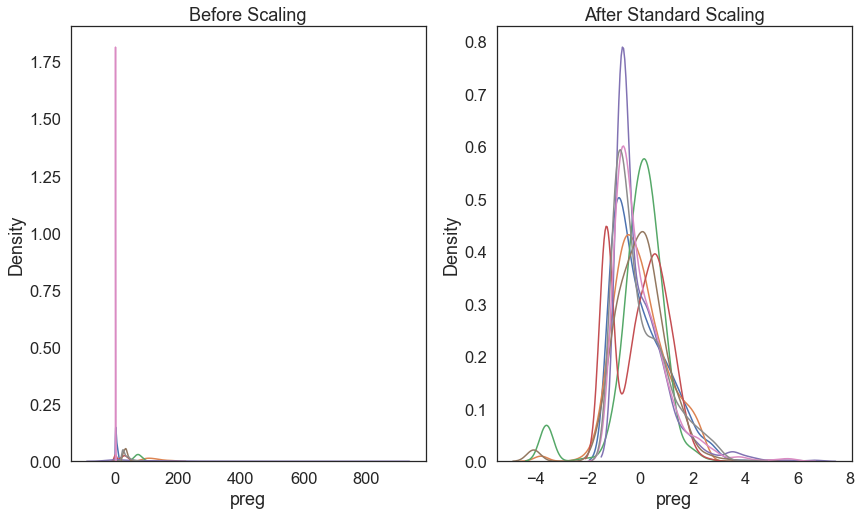

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

---

### Robust Scaler *******************************************

In [114]:
# The RobustScaler uses a similar method to the Min-Max scaler but it 
# instead uses the interquartile range, rathar than the min-max, so that 
# it is robust to outliers. 
#Formula: (x_i – Q_1(x))/(Q_3(x) – Q_1(x))

In [115]:
# For each feature.

# Of course this means it is using the less of the data for scaling so 
# it’s more suitable for when there are outliers in the data.

In [116]:
location = r"F:\anaconda\data sets\pima.csv"

In [117]:
# load the training data from pima data set
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [118]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)
dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [119]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [120]:
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df_before_scale)

In [121]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_scaled = pd.DataFrame(robust_scaled_df, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


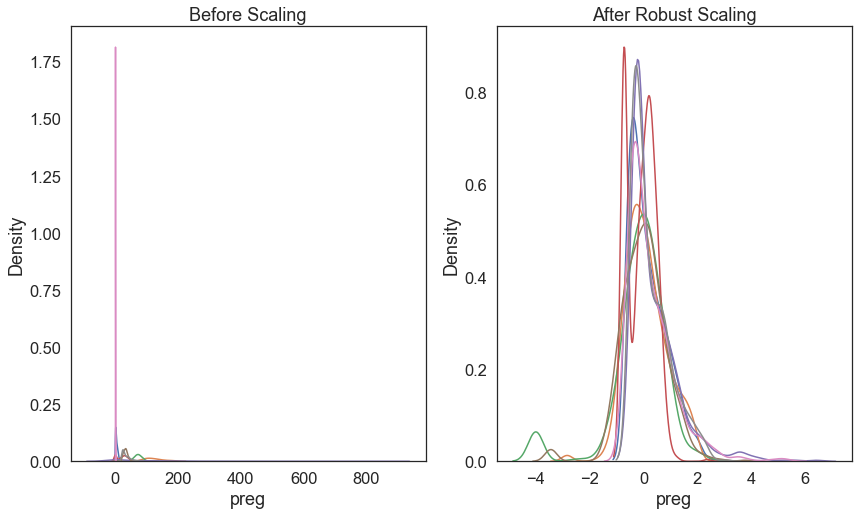

In [122]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After Robust Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

----

#### scikit learn label encoding

- LabelEncoder can be used to normalize labels.
- It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(['Y', 'N', 'May be'])

LabelEncoder()

In [124]:
le.classes_


array(['May be', 'N', 'Y'], dtype='<U6')

In [125]:
le.transform(['Y', 'Y', 'Y', 'Y']) 


array([2, 2, 2, 2], dtype=int64)

In [126]:
le.inverse_transform([2,1,0,2])


array(['Y', 'N', 'May be', 'Y'], dtype='<U6')

---

#### ordinal encoder

In [127]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X = [['Male', 1], ['Female', 3], ['Female', 2]]

enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [128]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]